In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import os

In [14]:
# Folder path containing the CSV files
folder_path = '../yfinance_data'

# List of your target CSV filenames
stock_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Loop through each file
for file in stock_files:
    stock_name = file.split("_")[0]  # Extract stock symbol
    file_path = os.path.join(folder_path, file)

    # Load the CSV
    df = pd.read_csv(file_path)

    # Convert Date to datetime, sort, and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

    # Drop rows with missing Close values
    df = df[df['Close'].notna()]

In [29]:

# Display the first 5 rows
print(df.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Dividends  Stock Splits  Daily Return  Cumulative Return  \
Date                                                                   
2010-06-29        0.0           0.0           NaN                NaN   
2010-06-30        0.0           0.0     -0.002511           0.997489   
2010-07-01        0.0           0.0     -0.078473           0.919213   
2010-07-02        0.0           0.0     -0.125683           0.803683   
2010-07-06        0.0           0.0

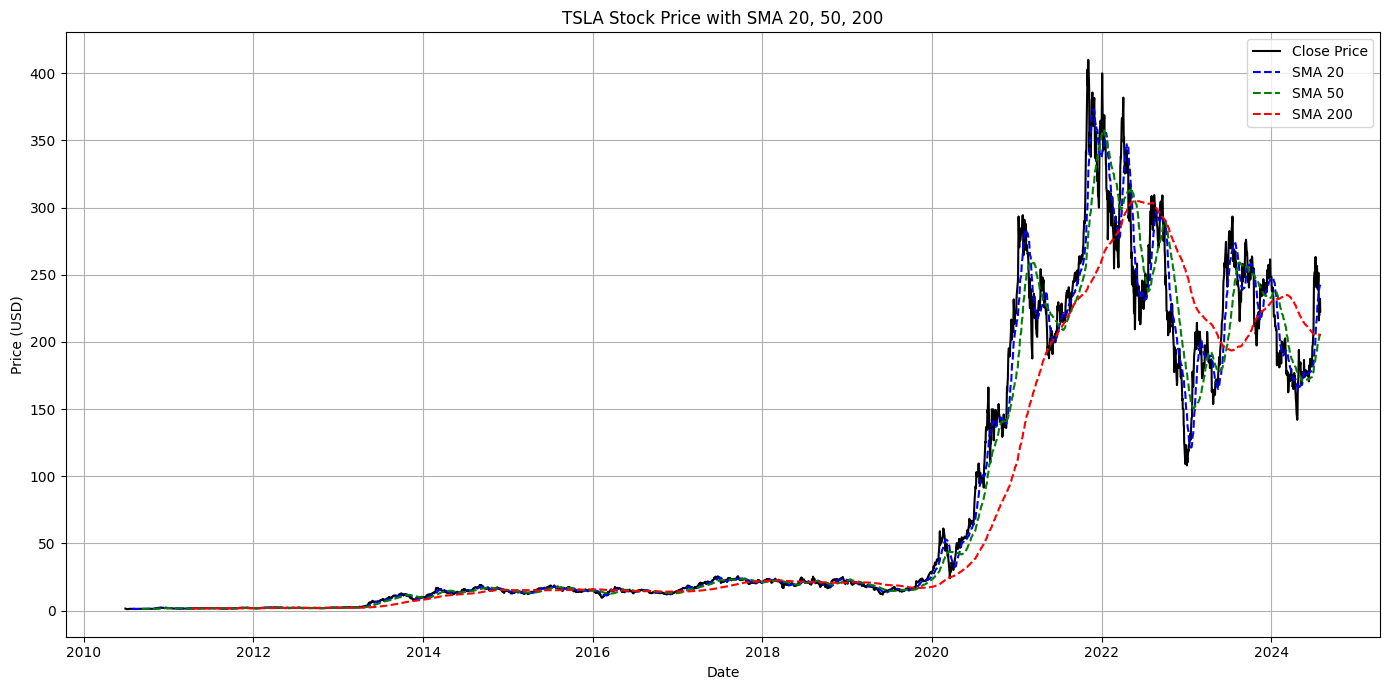

In [15]:
 # Calculate SMAs using TA-Lib
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)

    # Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='green', linestyle='--')
plt.plot(df['SMA_200'], label='SMA 200', color='red', linestyle='--')

plt.title(f"{stock_name} Stock Price with SMA 20, 50, 200")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()

    # Show the plot
plt.show()

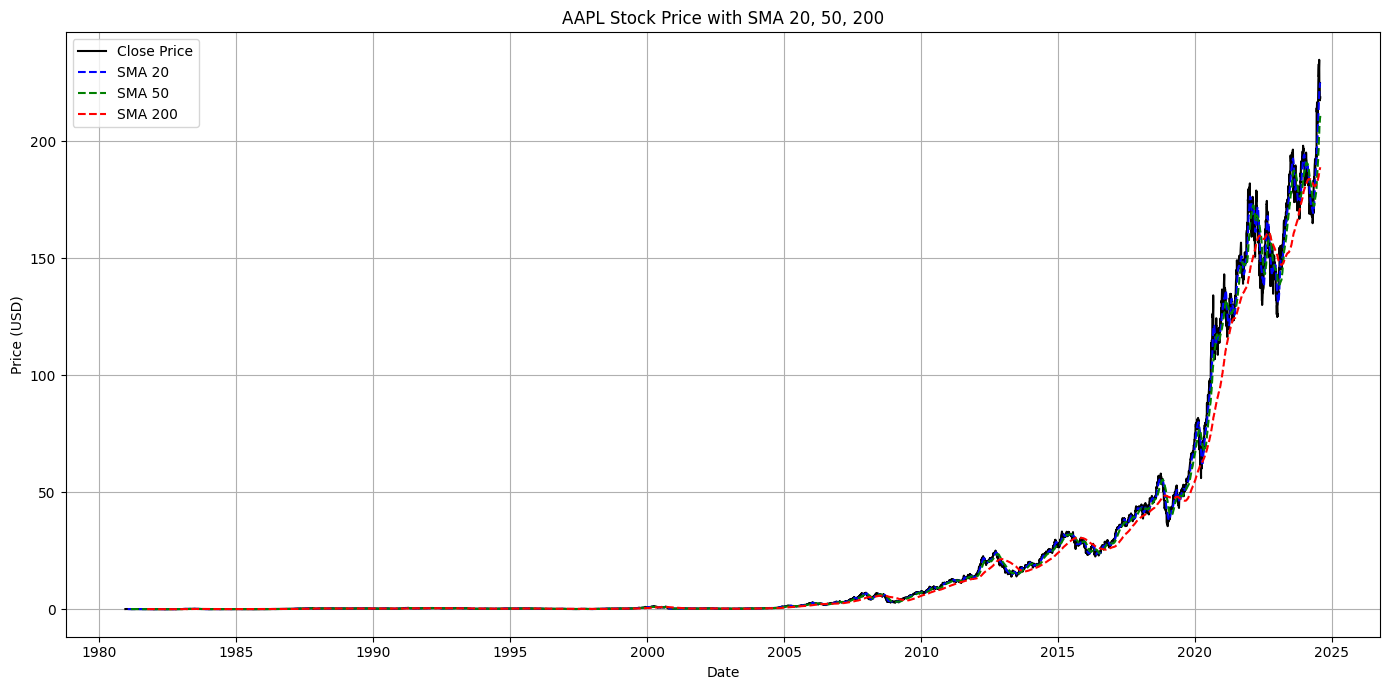

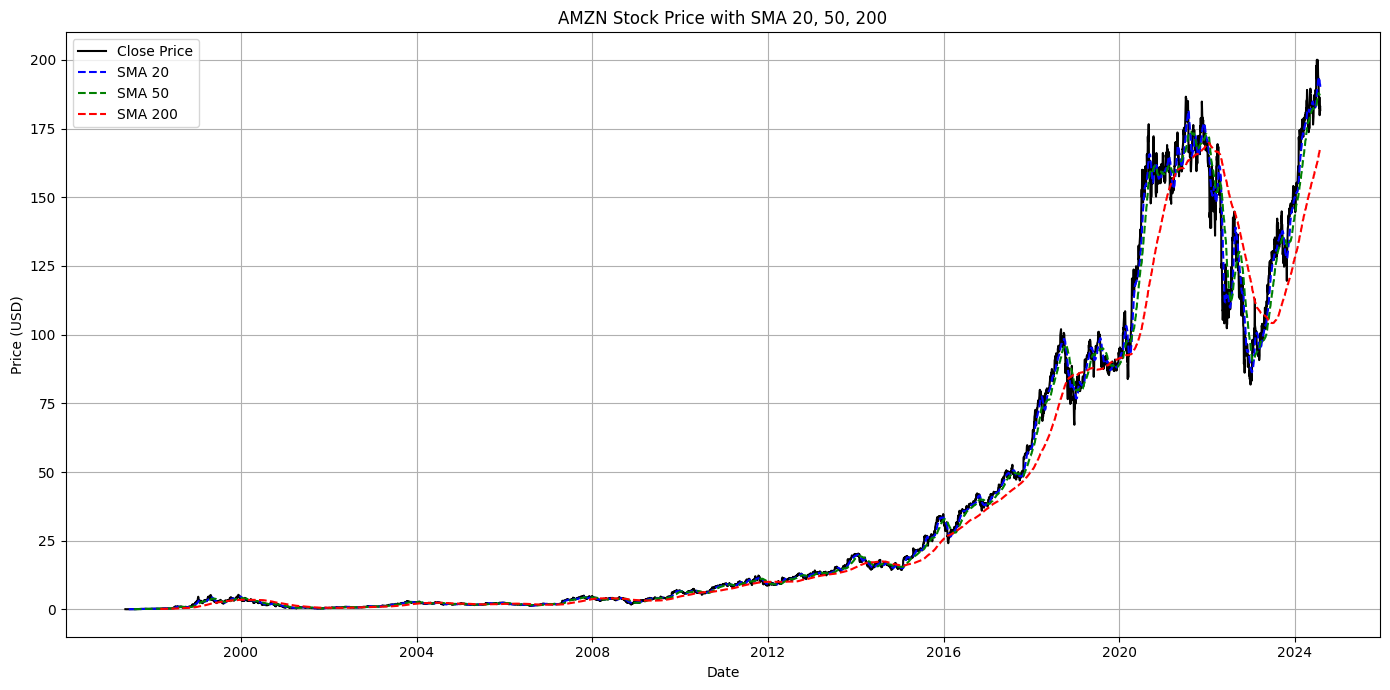

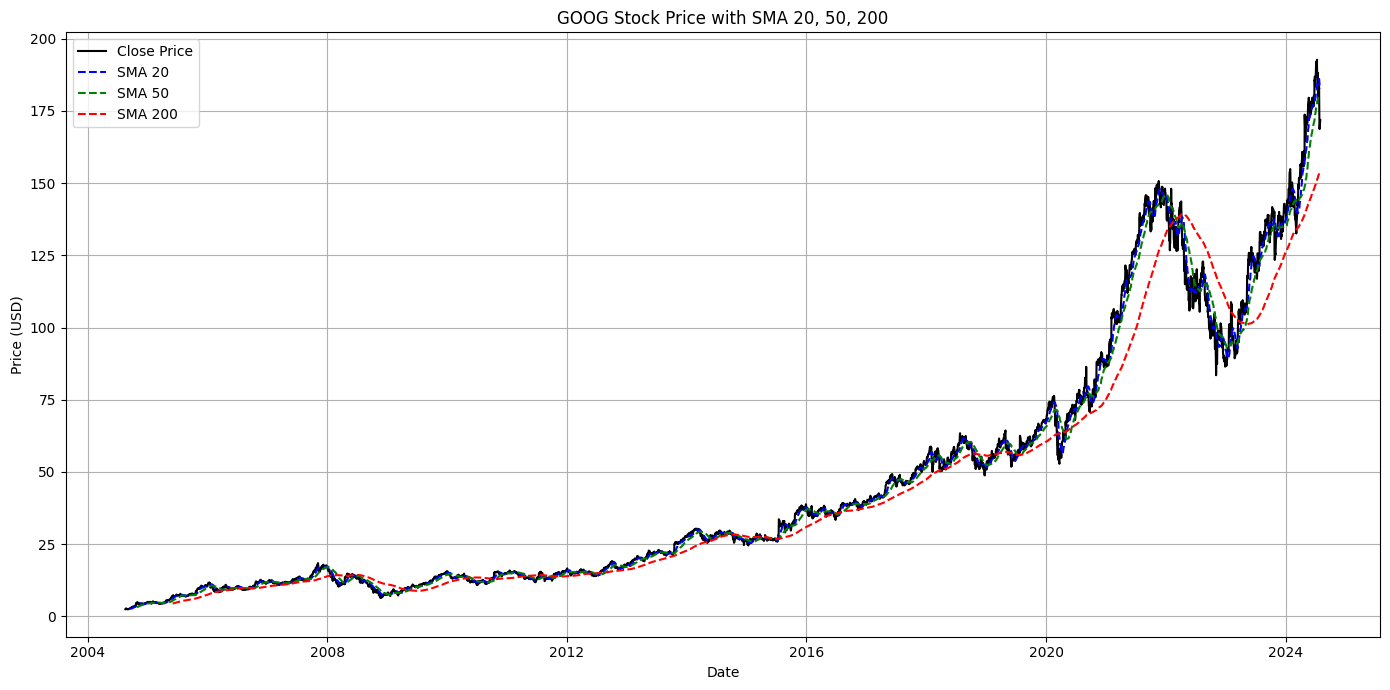

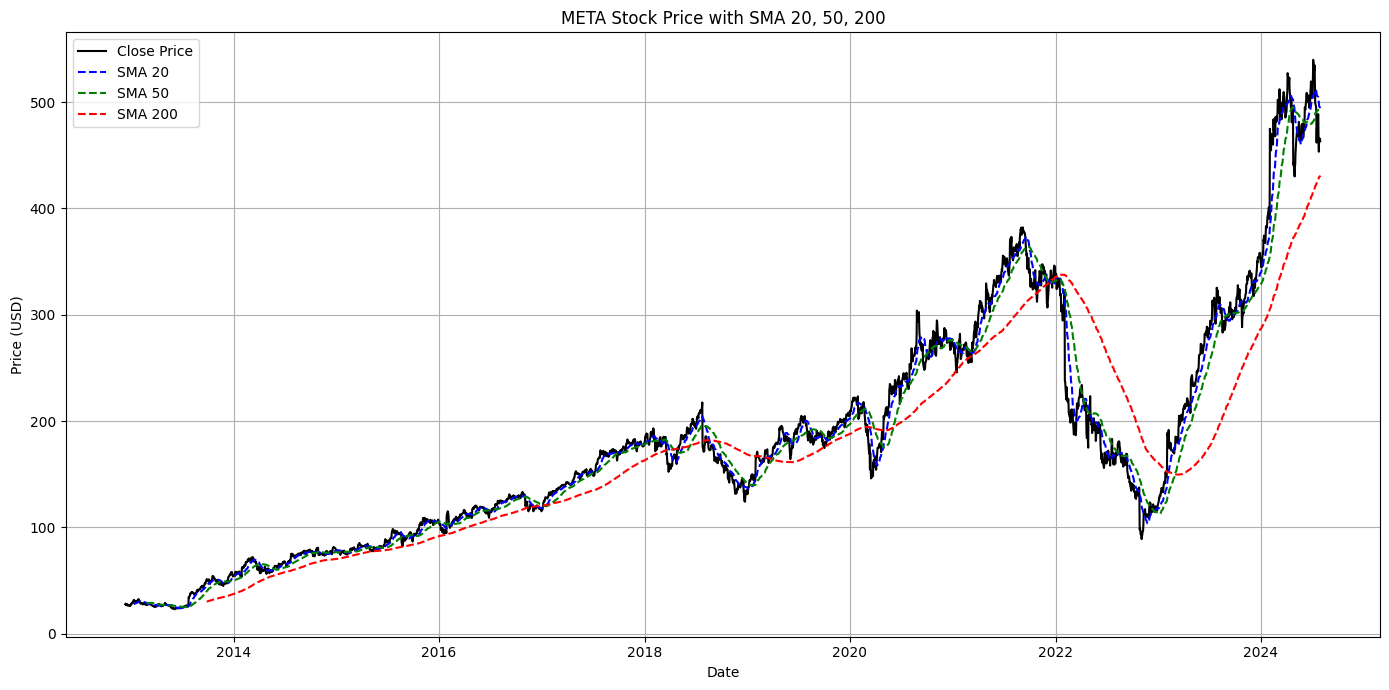

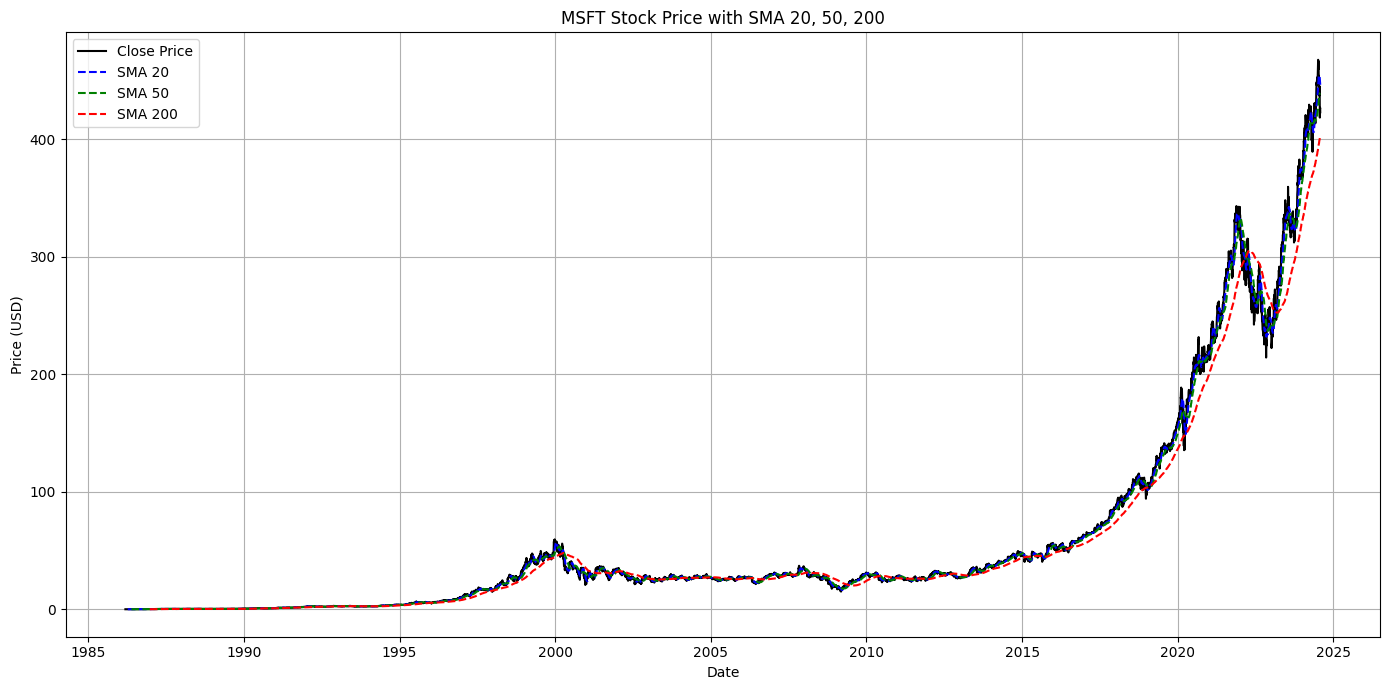

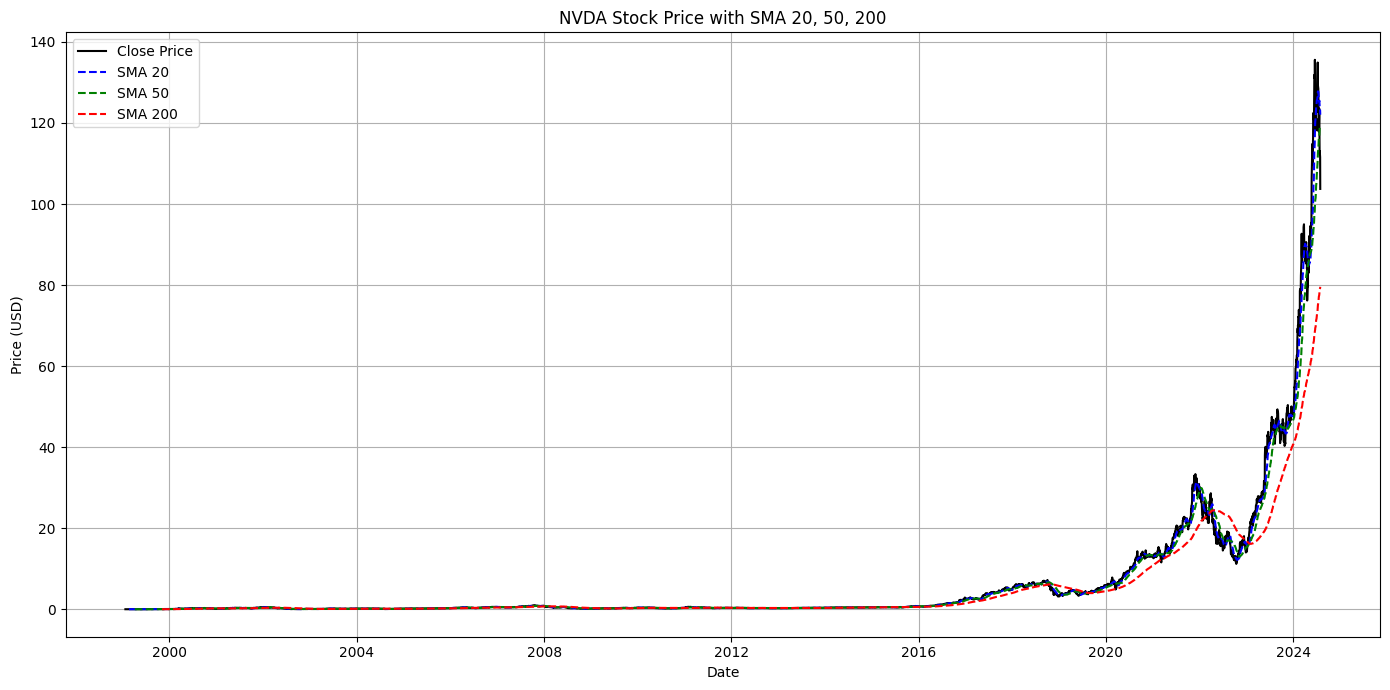

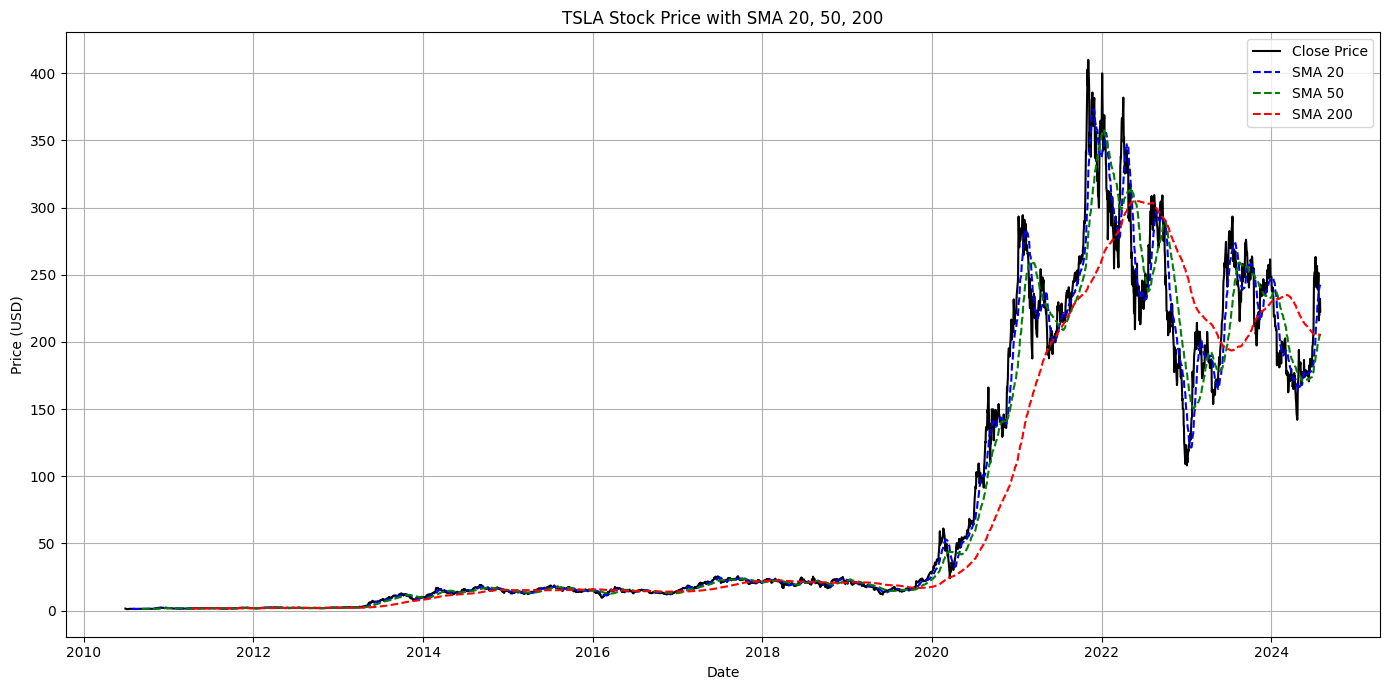

In [16]:
# List of expected CSV files
stock_symbols = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

# Loop over each symbol and process
for symbol in stock_symbols:
    file_name = f"{symbol}_historical_data.csv"
    file_path = os.path.join(folder_path, file_name)

    # Load data
    df = pd.read_csv(file_path)

    # Prepare DataFrame
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

    # Drop rows where 'Close' is missing
    df = df[df['Close'].notna()]

    # Calculate SMA indicators using TA-Lib
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', color='black')
    plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
    plt.plot(df['SMA_50'], label='SMA 50', color='green', linestyle='--')
    plt.plot(df['SMA_200'], label='SMA 200', color='red', linestyle='--')

    plt.title(f"{symbol} Stock Price with SMA 20, 50, 200")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

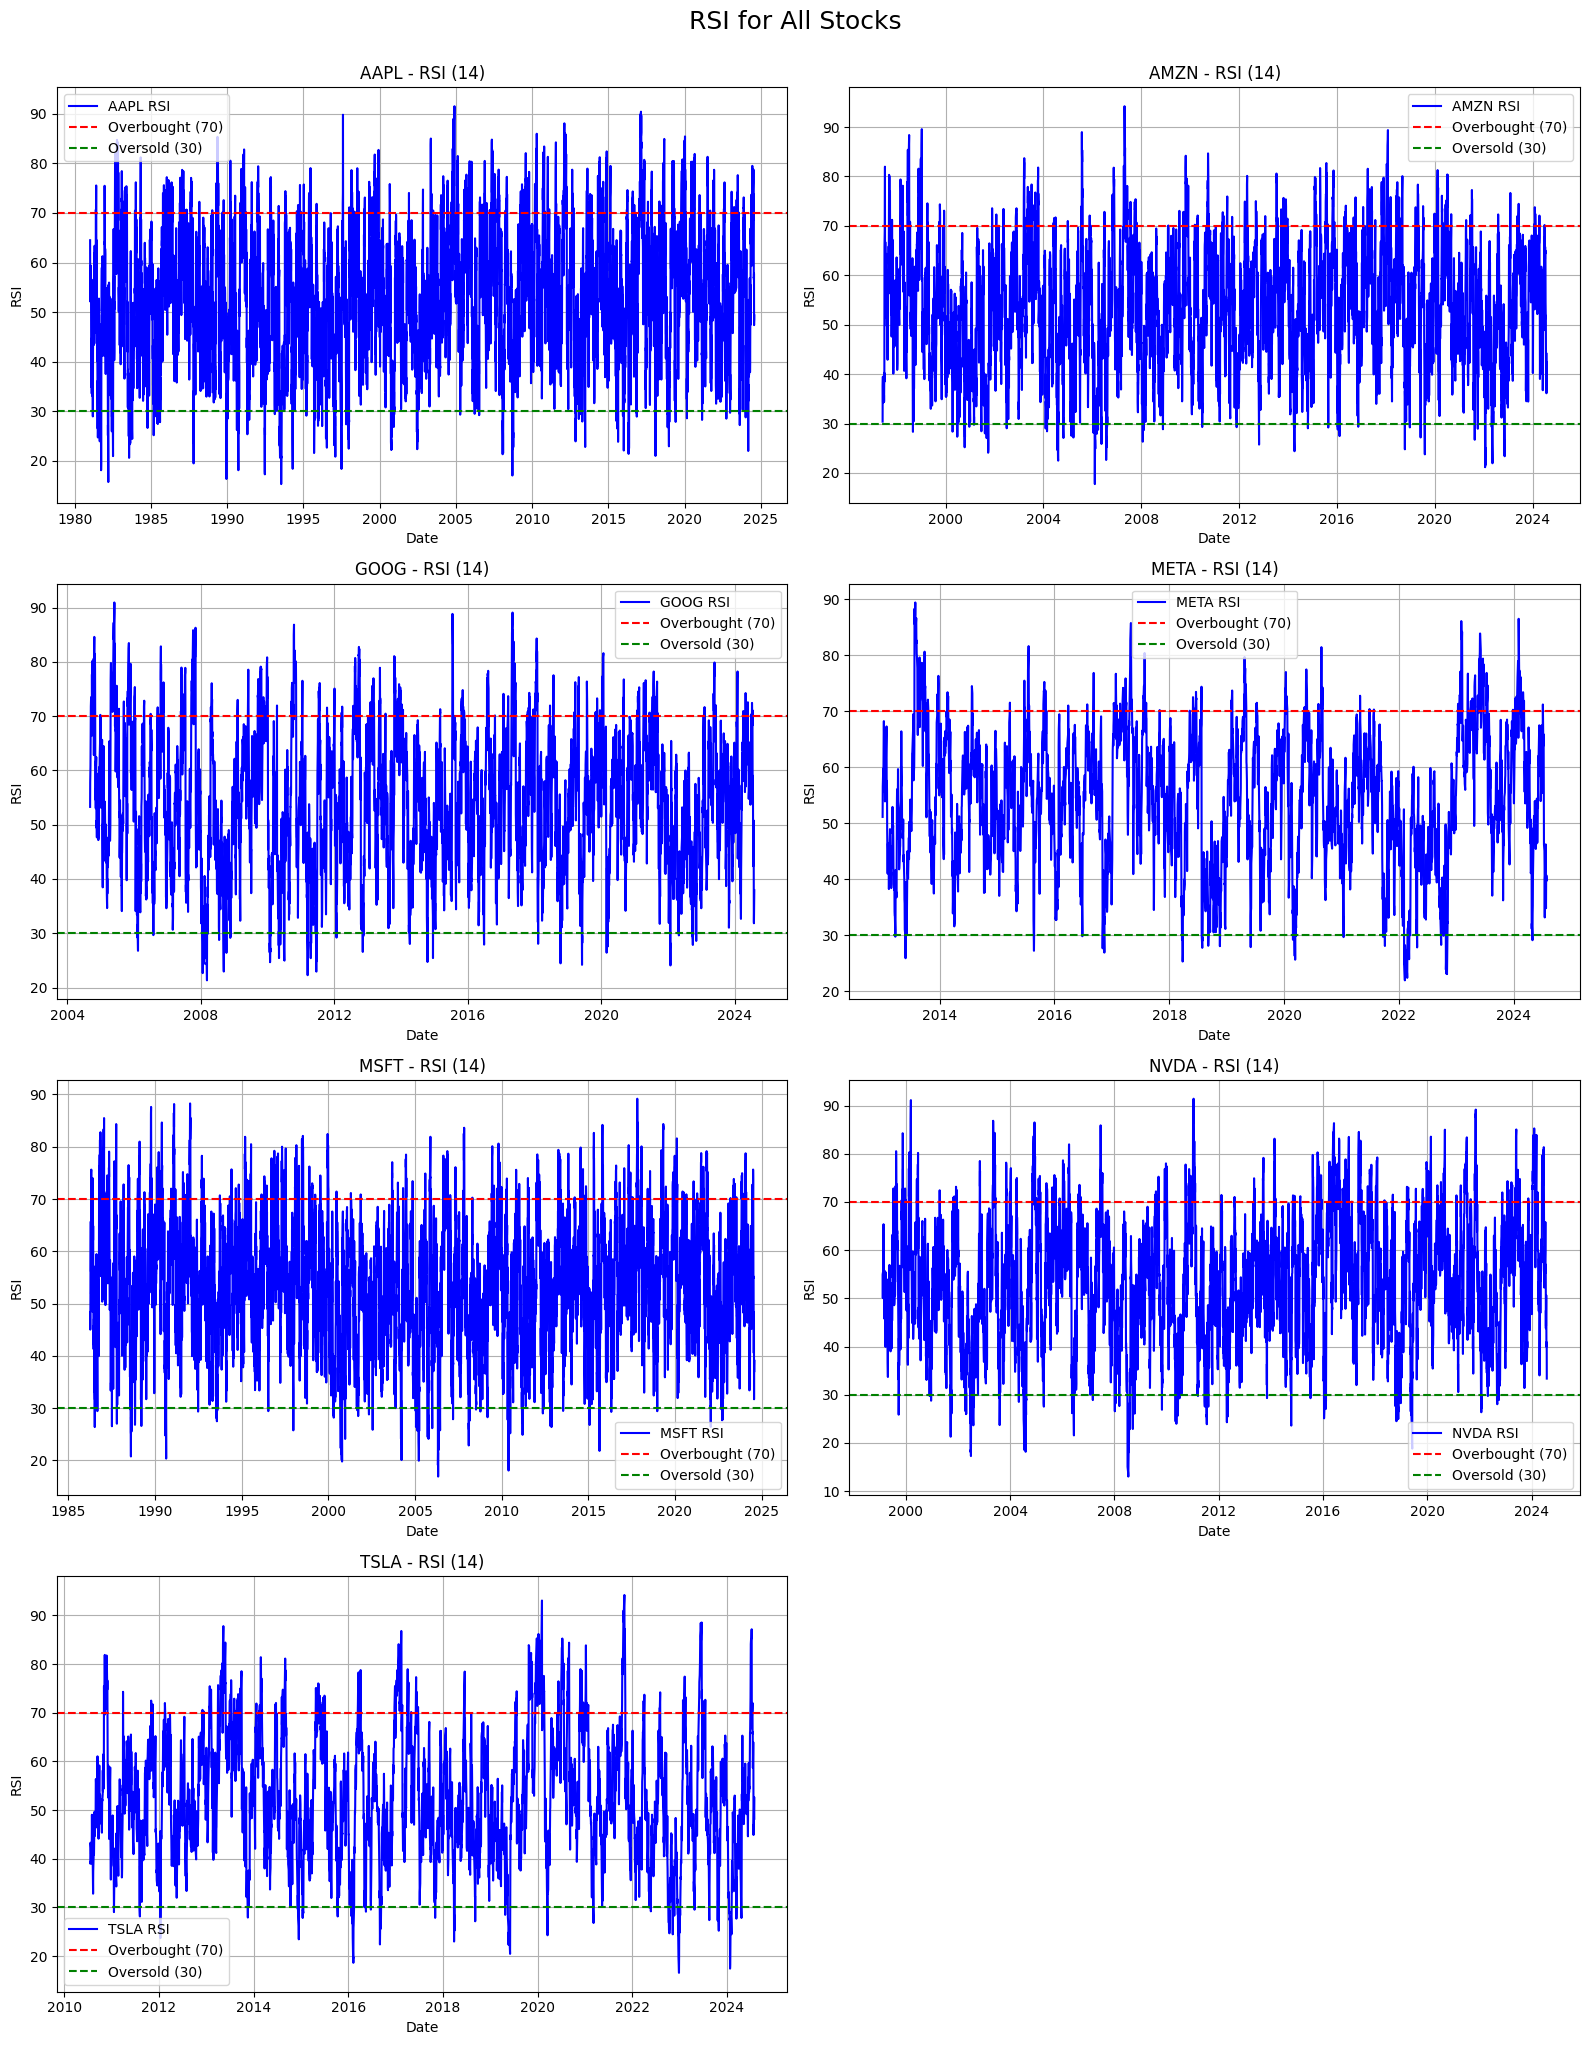

In [24]:
# Set up a single figure for RSI plots
plt.figure(figsize=(16, 20))

for idx, symbol in enumerate(stock_symbols, start=1):
    file_name = f"{symbol}_historical_data.csv"
    file_path = os.path.join(folder_path, file_name)

    # Load data
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    df = df[df['Close'].notna()]

    # Compute RSI
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

    # Plot RSI
    plt.subplot(4, 2, idx)
    plt.plot(df.index, df['RSI'], label=f'{symbol} RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{symbol} - RSI (14)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)

# Final adjustments
plt.tight_layout()
plt.suptitle('RSI for All Stocks', fontsize=18, y=1.02)
plt.show()

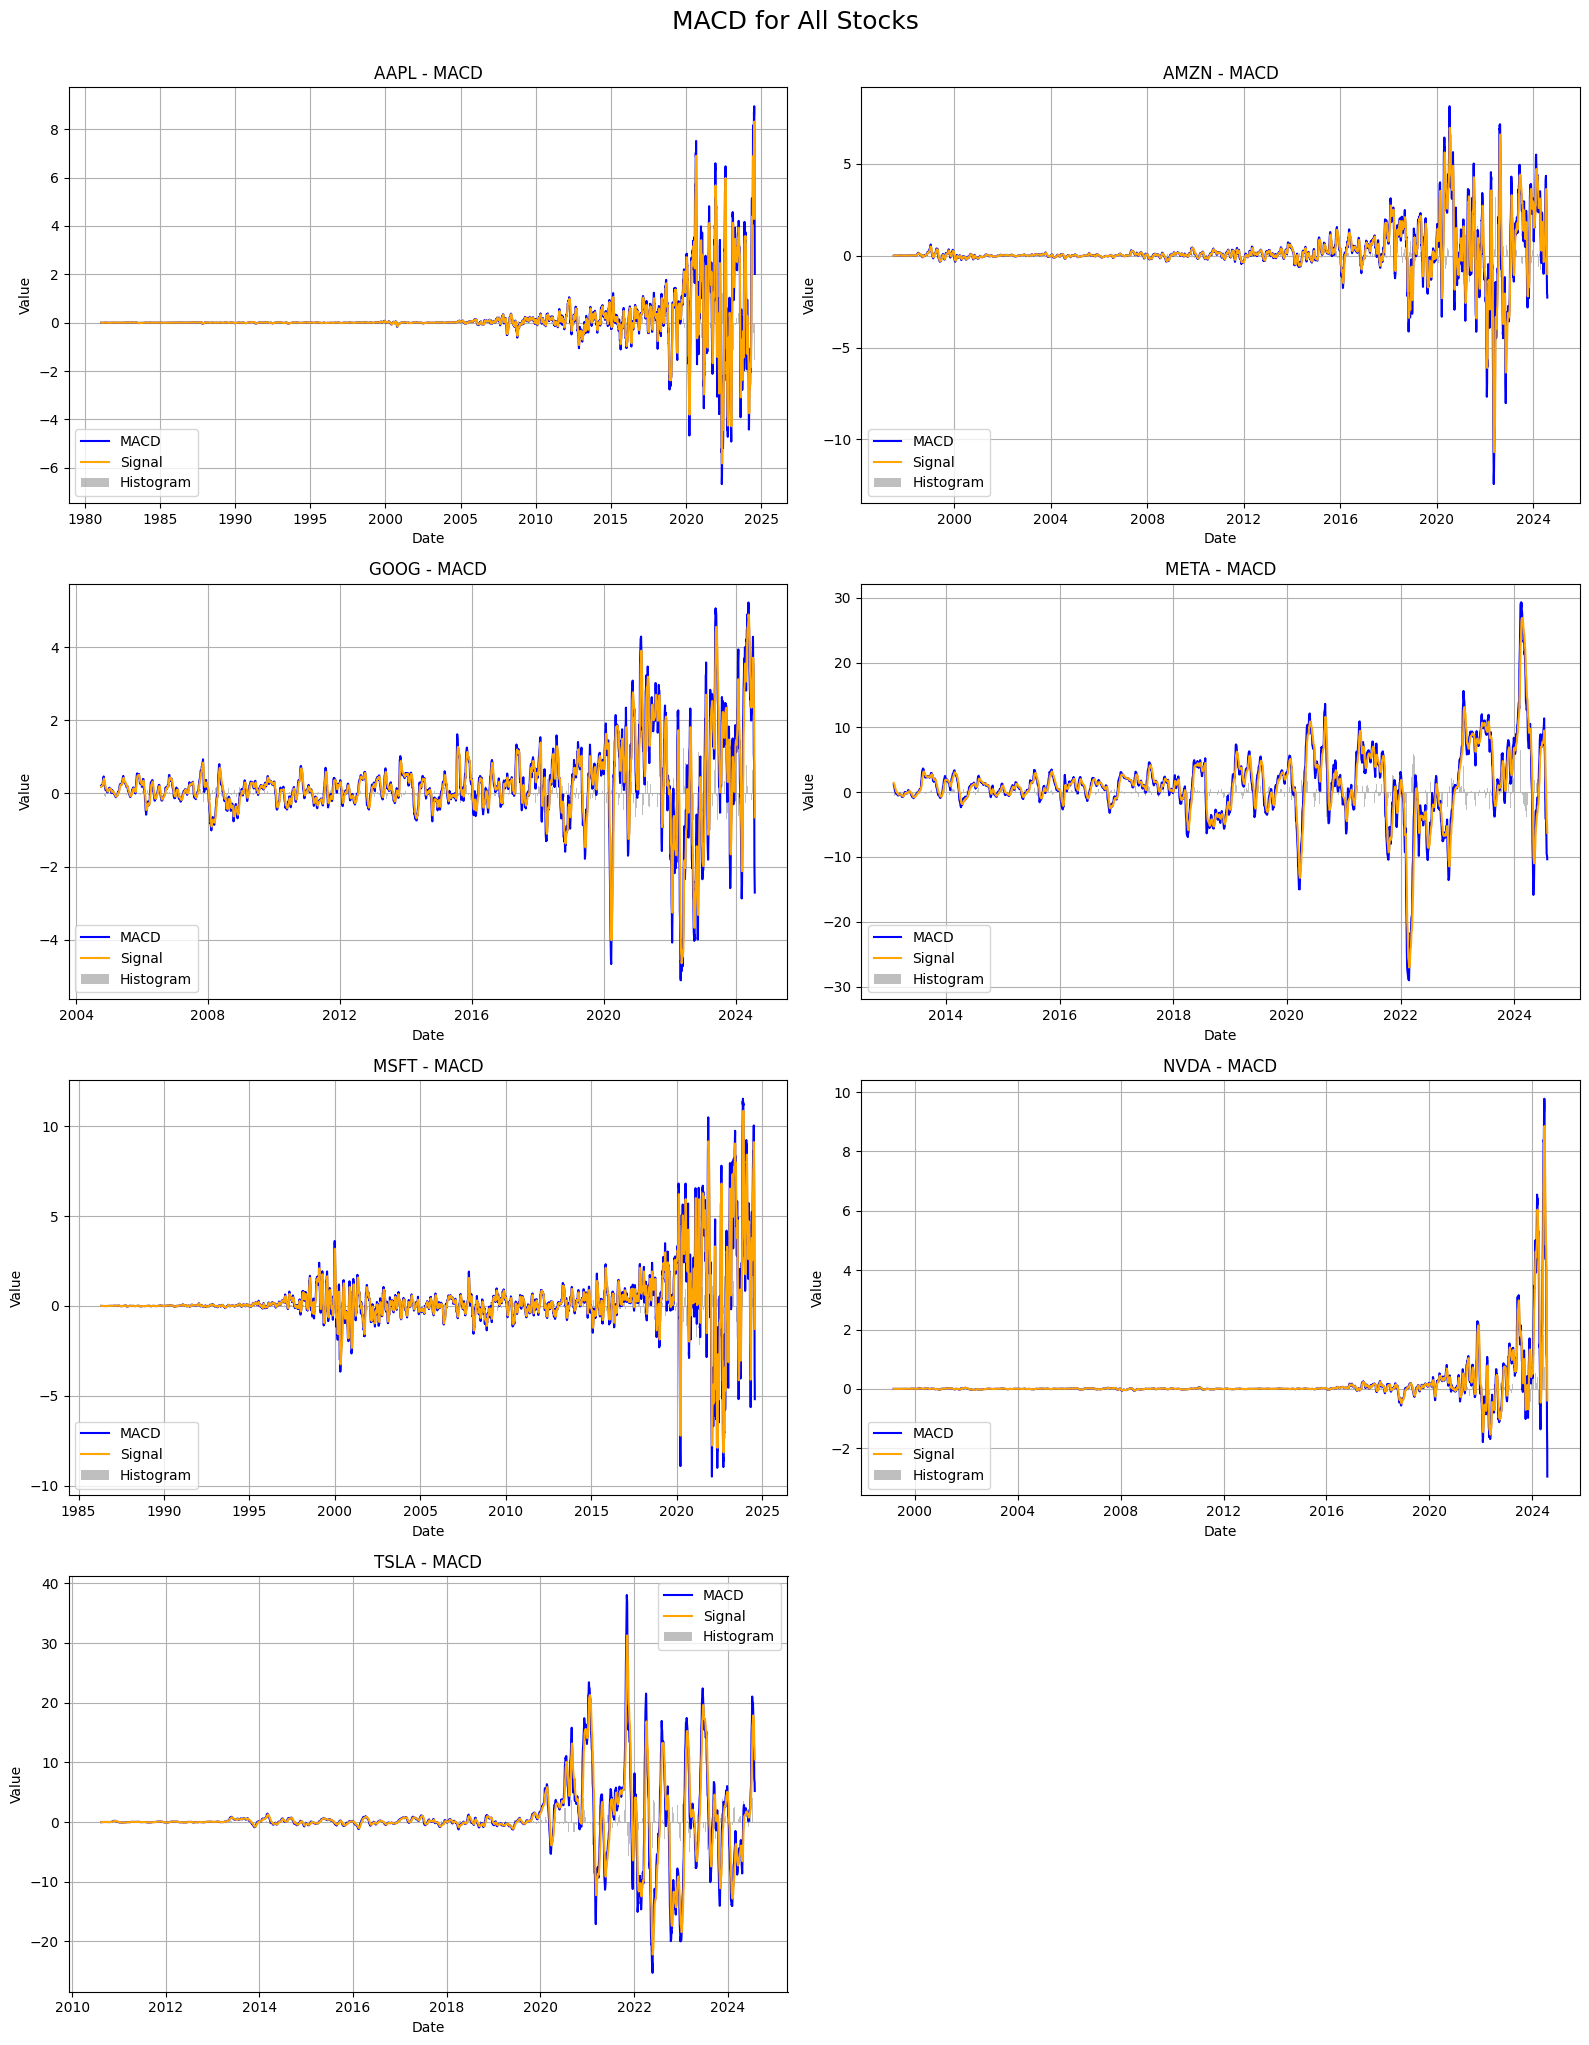

In [25]:
# Set up plotting
plt.figure(figsize=(16, 20))

for idx, symbol in enumerate(stock_symbols, start=1):
    file_name = f"{symbol}_historical_data.csv"
    file_path = os.path.join(folder_path, file_name)

    # Load and preprocess data
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    df = df[df['Close'].notna()]

    # Calculate MACD, Signal Line, and Histogram
    macd, signal, hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['Signal'] = signal
    df['Hist'] = hist

    # Plot MACD and Signal
    plt.subplot(4, 2, idx)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['Signal'], label='Signal', color='orange')
    plt.bar(df.index, df['Hist'], label='Histogram', color='gray', alpha=0.5)
    plt.title(f'{symbol} - MACD')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.suptitle('MACD for All Stocks', fontsize=18, y=1.02)
plt.show()

In [26]:
import pynance as pn

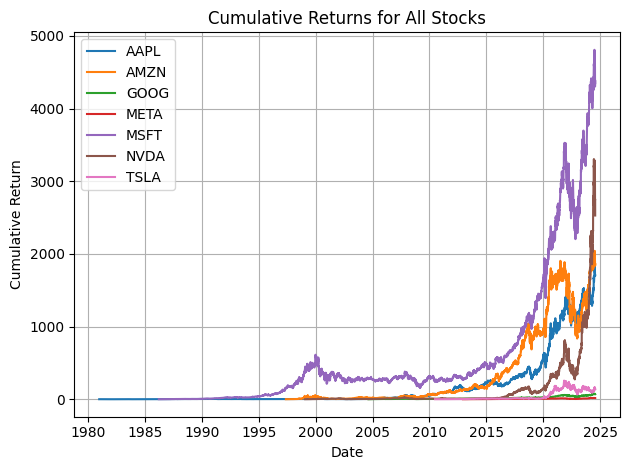


📊 Financial Metrics Summary:
  Stock  Average Daily Return (%)  Volatility (30d) (%)  Cumulative Return (%)
0  AAPL                      0.11                  1.52              170374.04
1  AMZN                      0.17                  1.66              185475.55
2  GOOG                      0.10                  1.69                6776.78
3  META                      0.13                  2.45                1579.44
4  MSFT                      0.11                  1.32              434904.44
5  NVDA                      0.19                  3.60              252801.31
6  TSLA                      0.20                  4.52               13877.81


In [28]:
# Dictionary to hold metrics
metrics_summary = []

for symbol in stock_symbols:
    file_name = f"{symbol}_historical_data.csv"
    file_path = os.path.join(folder_path, file_name)

    # Load data
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    df = df[df['Close'].notna()]

    # Compute daily returns
    df['Daily Return'] = df['Close'].pct_change()

    # Compute cumulative return
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

    # Compute rolling 30-day volatility
    df['Volatility (30d)'] = df['Daily Return'].rolling(window=30).std()

    # Save summary stats
    metrics_summary.append({
        'Stock': symbol,
        'Average Daily Return (%)': df['Daily Return'].mean() * 100,
        'Volatility (30d) (%)': df['Volatility (30d)'].iloc[-1] * 100,
        'Cumulative Return (%)': (df['Cumulative Return'].iloc[-1] - 1) * 100
    })

    # Optional: Plot Cumulative Return
    plt.plot(df.index, df['Cumulative Return'], label=symbol)

# Show cumulative return comparison
plt.title("Cumulative Returns for All Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display metrics summary
summary_df = pd.DataFrame(metrics_summary)
print("\n📊 Financial Metrics Summary:")
print(summary_df.round(2))